<a href="https://colab.research.google.com/github/Rohithv07/ml/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a predictive model that answers the question: "How many people are likely to survive?"

In this notebook, we make use of the Titanic Machine Learning from Disaster - A Kaggle Competition - in order to make a machine learning model to predict how many people are likely to survive the disaster.

## Problem Definition
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

https://www.kaggle.com/c/titanic/overview

## Data

The data we are given is mainly splitted into 2 groups:
1. Train.csv
2. Test.csv

For training set, we provide the outcome for each of the passengers.Our model will be based on "features" like passengers gender, and class.

For testing set, we will not be having the outcome and we need to predict it so we can understand how well our model fits into the data set.


## Evaluation
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

https://www.kaggle.com/c/titanic/overview/evaluation

## Features
Data Dictionary

Variable	Definition	    Key
survival	Survival	    0 = No, 1 = Yes
pclass	  Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

https://www.kaggle.com/c/titanic/data

First of all we can mount our drive and import the necessary modules like numpy, pandas, matplotlib etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Lets import the training data
df = pd.read_csv("drive/My Drive/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


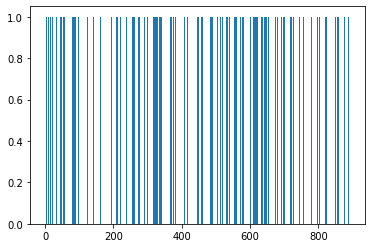

In [ ]:
# Lets just go through the datas and do some exploration and some visualization
fig, ax = plt.subplots()
# Lets try to do a bar graph on survived and the passengerId
plt.bar(df.PassengerId, df.Survived);

In [ ]:
# Lets find how many null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we have 177 values of age as null, cabin 687 as null and Embarked 2

In [ ]:
df.Name.dtype

dtype('O')

In [ ]:
df.Sex.dtype

dtype('O')

So we are seeing string, objects as the type and we need numerical data. So all the strings or other types need to be converted into numbers before we fit this into model.
What happens if we do not make it into numbers and tried to fit on a model.
Just a small showing by selecting any predictive model.

## Testing on what happens if we do not convert our data into numbers fully

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
X, y

(     PassengerId  Pclass  ... Cabin Embarked
 0              1       3  ...   NaN        S
 1              2       1  ...   C85        C
 2              3       3  ...   NaN        S
 3              4       1  ...  C123        S
 4              5       3  ...   NaN        S
 ..           ...     ...  ...   ...      ...
 886          887       2  ...   NaN        S
 887          888       1  ...   B42        S
 888          889       3  ...   NaN        S
 889          890       1  ...  C148        C
 890          891       3  ...   NaN        Q
 
 [891 rows x 11 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
len(X), len(y)

(891, 891)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train, y_train

(     PassengerId  Pclass  ... Cabin Embarked
 776          777       3  ...   F38        Q
 850          851       3  ...   NaN        S
 530          531       2  ...   NaN        S
 178          179       2  ...   NaN        S
 548          549       3  ...   NaN        S
 ..           ...     ...  ...   ...      ...
 322          323       2  ...   NaN        Q
 545          546       1  ...   NaN        S
 277          278       2  ...   NaN        S
 36            37       3  ...   NaN        C
 348          349       3  ...   NaN        S
 
 [712 rows x 11 columns],      PassengerId  Pclass  ... Cabin Embarked
 414          415       3  ...   NaN        S
 684          685       2  ...   NaN        S
 477          478       3  ...   NaN        S
 812          813       2  ...   NaN        S
 724          725       1  ...    E8        S
 ..           ...     ...  ...   ...      ...
 192          193       3  ...   NaN        S
 459          460       3  ...   NaN        Q
 637   

In [ ]:
model = SGDRegressor(penalty="l2", max_iter=5)
model.fit(X_train, y_train)

# Before hitting the run, it is sure that an error will be shown and our model will not be fitted into the data due to non numerical data

ValueError: ignored

So as expected we see a valueError. SO our next step must be to turn all the string to numerical data

## Convert Strings to Categories

In [ ]:
pd.api.types.is_string_dtype(df["Sex"])

True

In [ ]:
# Lets do a loop to find all string type
for label, content in df.items():
  if (pd.api.types.is_string_dtype(content)):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


Now we know what are the string values given in the data set. So now we can convert them into numericals

In [ ]:
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    df[label] = content.astype("category").cat.as_ordered()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


**Now we see all our values are filled and changed from strings to categorical types**

Next step what we have to do is we still have some missing datas in our data set and we need to somehow fill those columns with some suitable values.